# Read and Write SAS datasets from local drive
We will explore how we can read and write SAS datasets from local drive to Python kernel of Jupyter notebook.  
We will discuss three ways to play with SAS datasets
-  pandas.read_sas
-  xport package
-  sas7bdat package

In [1]:
### Import modules
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import xport  ## write sas datasets to local drive
from sas7bdat import SAS7BDAT  ## read SAS datasets from local drive

## Read SAS datasets

- [working read](#working-read) <br>
    with SAS7BDAT('./data/in/adtteos.sas7bdat') as file: <br>
    df_dm = file.to_data_frame()
    
    with open('./data/in/dm.xpt', 'rb') as f: <br>
    _xport_dm = xport.to_columns(f) <br>
    _xport_dm2 = pd.DataFrame(_xport_dm)   
    

- [not working read](#not-working-read)        
    with SAS7BDAT('./data/in/dm.xpt') as file: <br>
    df_dm = file.to_data_frame()
    
    with open('./data/in/adtteos.sas7bdat', 'rb') as f: <br>
    _xport_dm3 = xport.to_columns(f)  <br>
    _xport_dm4 = pd.DataFrame(_xport_dm3) <br>
    
    
- [working but not clearly read](#working-but-not-clearly-read)   
    _dm = pd.read_sas('./data/in/dm.xpt') <br>
    _dm = pd.read_sas('./data/in/adtteos.sas7bdat')  <br>
    STUDYID(character) is b'1501'  <br>

### working read

In [3]:
with SAS7BDAT('./data/in/adtteos.sas7bdat') as file: 
    df_dm = file.to_data_frame()
df_dm.head()

,SUBJID,SITEID,FASFL,SAFFL,TRTP,TRTPN,PARAM,PARAMCD,PARAMTYP,AVISIT,AVISITN,AVAL,STARTDT,ADT,ADTF,CNSR,EVNTDESC
0,310-001,310,Y,Y,Control,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,1.0,2007-11-12,2007-11-12,,0.0,DEATH
1,310-002,310,Y,Y,Control,1.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,83.0,2008-01-11,2008-04-02,,1.0,COMPLETE PERIOD WITHOUT EVENT
2,310-003,310,Y,Y,Study Drug,2.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,84.0,2008-02-01,2008-04-24,,0.0,DEATH
3,310-004,310,Y,Y,Study Drug,2.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,9.0,2008-02-07,2008-02-15,,0.0,DEATH
4,310-005,310,Y,Y,Study Drug,2.0,Days to Death,DEATH,DERIVED,Double-Blind Period,91.0,51.0,2008-02-21,2008-04-11,,0.0,DEATH


In [4]:
with open('./data/in/dm.xpt', 'rb') as f: 
    _xport_dm = xport.to_columns(f)
    _xport_dm2 = pd.DataFrame(_xport_dm) 
_xport_dm2.head()

,AGE,AGEU,ARM,ARMCD,COUNTRY,DMDTC,DMDY,DOMAIN,RACE,RFENDTC,RFSTDTC,SEX,SITEID,STUDYID,SUBJID,USUBJID
0,63.0,YEARS,Placebo,Pbo,USA,2013-12-26,-7.0,DM,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",2014-07-02,2014-01-02,F,701,CDISCPILOT01,1015,01-701-1015
1,64.0,YEARS,Placebo,Pbo,USA,2012-07-22,-14.0,DM,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",2012-09-02,2012-08-05,M,701,CDISCPILOT01,1023,01-701-1023
2,71.0,YEARS,Xanomeline High Dose,Xan_Hi,USA,2013-07-11,-8.0,DM,CAUCASIAN,2014-01-14,2013-07-19,M,701,CDISCPILOT01,1028,01-701-1028
3,74.0,YEARS,Xanomeline Low Dose,Xan_Lo,USA,2014-03-10,-8.0,DM,CAUCASIAN,2014-04-14,2014-03-18,M,701,CDISCPILOT01,1033,01-701-1033
4,77.0,YEARS,Xanomeline High Dose,Xan_Hi,USA,2014-06-24,-7.0,DM,CAUCASIAN,2014-12-30,2014-07-01,F,701,CDISCPILOT01,1034,01-701-1034


### not working read

In [6]:
#with SAS7BDAT('./data/in/dm.xpt') as file: 
#    df_dm = file.to_data_frame()

SAS7BDAT module to_data_frame function does not work.  It provides error message. 
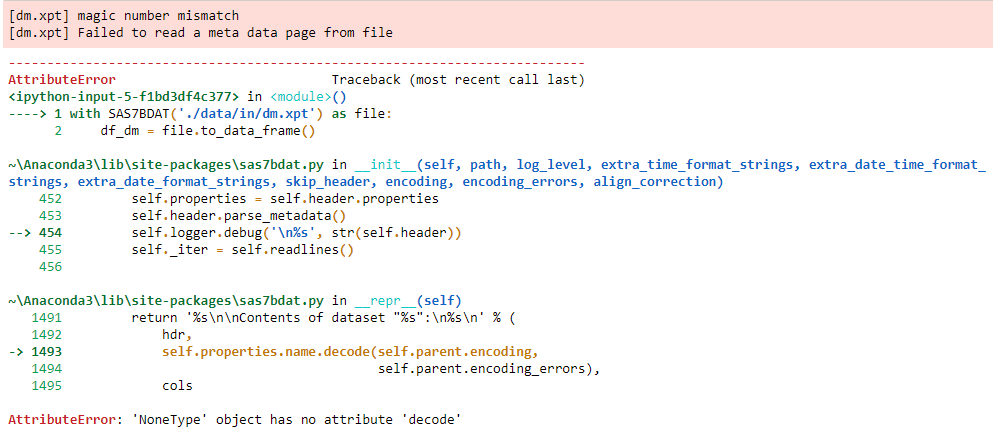

In [8]:
#with open('./data/in/adtteos.sas7bdat', 'rb') as f: 
#    _xport_dm3 = xport.to_columns(f)
#    _xport_dm4 = pd.DataFrame(_xport_dm3) 
#_xport_dm4.head()

xport module can't read sas7bdat.  
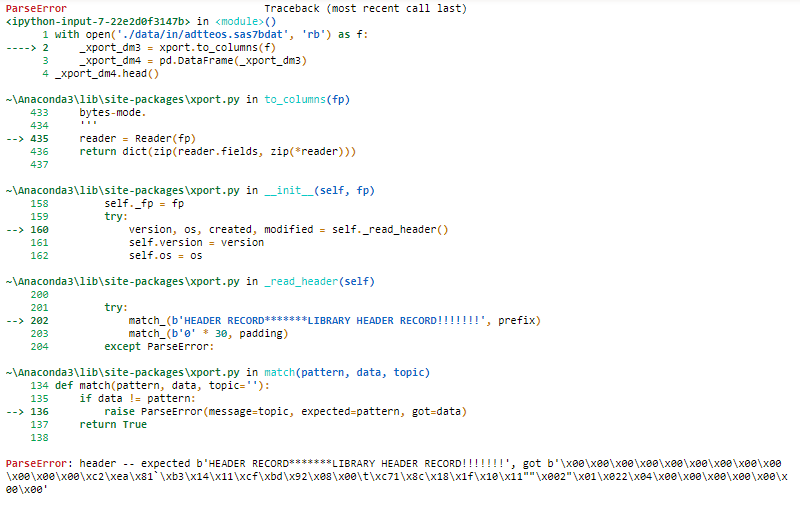

### working but not clearly read
Below Python function can read SAS datasets, but it has b'' object variables, so this is not ideal way to read SAS datasets

In [9]:
_dm = pd.read_sas('./data/in/dm.xpt', format='xport')
_dm.head()

,STUDYID,USUBJID,DOMAIN,SUBJID,RFSTDTC,RFENDTC,SITEID,AGE,AGEU,SEX,RACE,ARMCD,ARM,COUNTRY,DMDTC,DMDY
0,b'CDISCPILOT01',b'01-701-1015',b'DM',b'1015',b'2014-01-02',b'2014-07-02',b'701',63.0,b'YEARS',b'F',"b'HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRA...",b'Pbo',b'Placebo',b'USA',b'2013-12-26',-7.0
1,b'CDISCPILOT01',b'01-701-1023',b'DM',b'1023',b'2012-08-05',b'2012-09-02',b'701',64.0,b'YEARS',b'M',"b'HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRA...",b'Pbo',b'Placebo',b'USA',b'2012-07-22',-14.0
2,b'CDISCPILOT01',b'01-701-1028',b'DM',b'1028',b'2013-07-19',b'2014-01-14',b'701',71.0,b'YEARS',b'M',b'CAUCASIAN',b'Xan_Hi',b'Xanomeline High Dose',b'USA',b'2013-07-11',-8.0
3,b'CDISCPILOT01',b'01-701-1033',b'DM',b'1033',b'2014-03-18',b'2014-04-14',b'701',74.0,b'YEARS',b'M',b'CAUCASIAN',b'Xan_Lo',b'Xanomeline Low Dose',b'USA',b'2014-03-10',-8.0
4,b'CDISCPILOT01',b'01-701-1034',b'DM',b'1034',b'2014-07-01',b'2014-12-30',b'701',77.0,b'YEARS',b'F',b'CAUCASIAN',b'Xan_Hi',b'Xanomeline High Dose',b'USA',b'2014-06-24',-7.0


In [10]:
_dm2 = pd.read_sas('./data/in/adtteos.sas7bdat', format='sas7bdat')
_dm2.head()

,SUBJID,SITEID,FASFL,SAFFL,TRTP,TRTPN,PARAM,PARAMCD,PARAMTYP,AVISIT,AVISITN,AVAL,STARTDT,ADT,ADTF,CNSR,EVNTDESC
0,b'310-001',b'310',b'Y',b'Y',b'Control',1.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,1.0,2007-11-12,2007-11-12,NaN,0.0,b'DEATH'
1,b'310-002',b'310',b'Y',b'Y',b'Control',1.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,83.0,2008-01-11,2008-04-02,NaN,1.0,b'COMPLETE PERIOD WITHOUT EVENT'
2,b'310-003',b'310',b'Y',b'Y',b'Study Drug',2.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,84.0,2008-02-01,2008-04-24,NaN,0.0,b'DEATH'
3,b'310-004',b'310',b'Y',b'Y',b'Study Drug',2.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,9.0,2008-02-07,2008-02-15,NaN,0.0,b'DEATH'
4,b'310-005',b'310',b'Y',b'Y',b'Study Drug',2.0,b'Days to Death',b'DEATH',b'DERIVED',b'Double-Blind Period',91.0,51.0,2008-02-21,2008-04-11,NaN,0.0,b'DEATH'


## Write SAS datasets
You can write SAS datasets using xport option.  Currently, only xpt format can be created in local drive.

### Working write

In [11]:
### Write SAS datasets to local drive
with open('./data/out/xport_demo.xpt', 'wb') as f:
    xport.from_dataframe(_xport_dm2, f)

Python xport function can create SAS xport dataset in local drive.
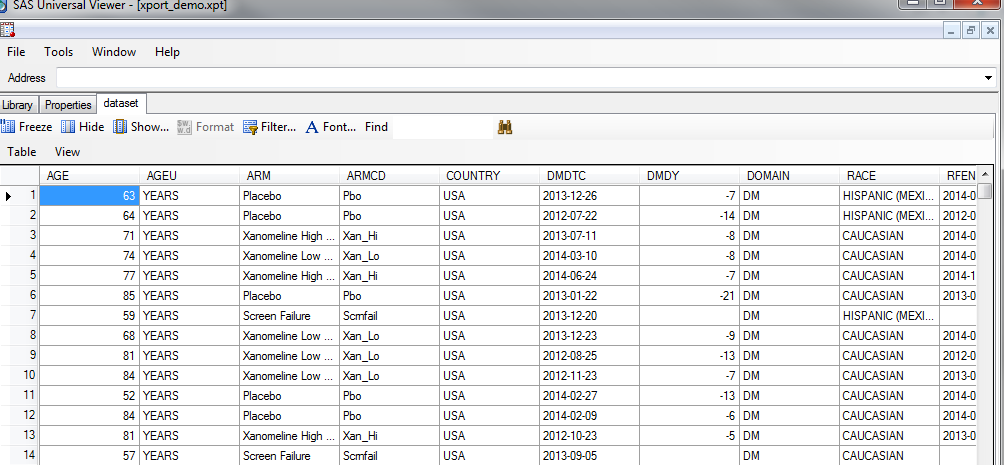

### Not working write

In [12]:
with open('./data/out/xport_demo.sas7bdat', 'wb') as f:
    xport.from_dataframe(_xport_dm2, f)

This code creates xport_demo.sas7bdat, but it is not readable by SAS viewer.  
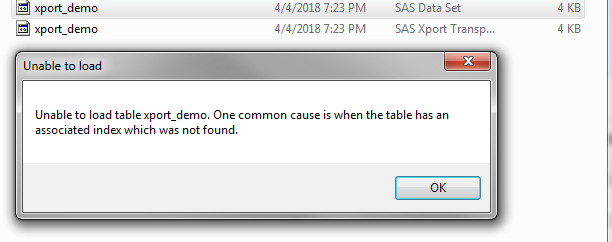